In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
Image_size=256
Batch_size=32
Channels=3
Epochs=5

In [5]:
 dataset=tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",shuffle=True,image_size=(Image_size,Image_size),batch_size=Batch_size)

Found 2152 files belonging to 3 classes.


In [6]:
type(dataset)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [19]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
class_names=dataset.class_names

In [21]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [22]:
c=0
for image_batch, label_batch in dataset.take(32):
    c=c+1
    print(label_batch)
print(c)

tf.Tensor([0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 2 1 1 1 0 2 0 1 0 0 1 0 2], shape=(32,), dtype=int32)
tf.Tensor([1 2 0 0 1 0 0 1 0 1 0 1 0 0 0 1 2 1 1 0 1 0 1 0 0 2 2 2 1 0 1 0], shape=(32,), dtype=int32)
tf.Tensor([2 2 0 1 0 1 1 1 1 0 2 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1], shape=(32,), dtype=int32)
tf.Tensor([1 1 1 0 0 1 0 1 1 0 1 0 2 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1], shape=(32,), dtype=int32)
tf.Tensor([1 0 0 0 1 0 2 1 1 1 1 1 1 0 0 0 1 1 1 1 1 2 0 0 1 1 1 1 0 1 0 1], shape=(32,), dtype=int32)
tf.Tensor([2 0 0 1 0 1 2 0 2 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 2 1 0 0 0 1 0], shape=(32,), dtype=int32)
tf.Tensor([1 1 0 1 2 0 0 1 1 1 1 1 1 0 0 1 0 1 2 1 0 1 1 0 0 1 0 1 1 0 1 1], shape=(32,), dtype=int32)
tf.Tensor([2 0 1 1 0 2 1 1 0 1 1 0 1 0 1 0 1 0 0 2 1 0 0 1 1 1 1 1 1 1 1 2], shape=(32,), dtype=int32)
tf.Tensor([1 1 1 2 0 1 0 2 0 1 2 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 2 0 0], shape=(32,), dtype=int32)
tf.Tensor([1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 2 2 2 1 0 0 0 0 0 0 1 1 1 1 0 0 

In [23]:
c=0
for image_batch, label_batch in dataset.take(1):
    c=c+1
    print(image_batch)
print(c)

tf.Tensor(
[[[[114. 102. 112.]
   [109.  97. 107.]
   [104.  92. 102.]
   ...
   [118. 105. 114.]
   [111.  98. 107.]
   [122. 109. 118.]]

  [[115. 103. 113.]
   [118. 106. 116.]
   [120. 108. 118.]
   ...
   [123. 110. 119.]
   [109.  96. 105.]
   [111.  98. 107.]]

  [[121. 109. 119.]
   [124. 112. 122.]
   [123. 111. 121.]
   ...
   [119. 106. 115.]
   [111.  98. 107.]
   [119. 106. 115.]]

  ...

  [[167. 161. 173.]
   [166. 160. 172.]
   [166. 160. 172.]
   ...
   [165. 156. 161.]
   [164. 155. 160.]
   [163. 154. 159.]]

  [[165. 159. 171.]
   [164. 158. 170.]
   [164. 158. 170.]
   ...
   [163. 154. 159.]
   [162. 153. 158.]
   [160. 151. 156.]]

  [[161. 155. 167.]
   [161. 155. 167.]
   [161. 155. 167.]
   ...
   [161. 152. 157.]
   [159. 150. 155.]
   [157. 148. 153.]]]


 [[[135. 133. 146.]
   [142. 140. 153.]
   [146. 144. 157.]
   ...
   [122. 118. 132.]
   [118. 114. 128.]
   [118. 114. 128.]]

  [[139. 137. 150.]
   [146. 144. 157.]
   [151. 149. 162.]
   ...
   [121. 1

In [24]:
len(dataset)

68

In [25]:
68*32

2176

In [26]:
c=0
for image_batch in dataset.take(1):
    c=c+1
    print(image_batch)
print(c)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[167., 149., 149.],
         [169., 151., 151.],
         [163., 145., 145.],
         ...,
         [131., 102., 104.],
         [136., 107., 109.],
         [136., 107., 109.]],

        [[169., 151., 151.],
         [173., 155., 155.],
         [169., 151., 151.],
         ...,
         [130., 101., 103.],
         [136., 107., 109.],
         [145., 116., 118.]],

        [[169., 151., 151.],
         [175., 157., 157.],
         [173., 155., 155.],
         ...,
         [130., 101., 103.],
         [133., 104., 106.],
         [148., 119., 121.]],

        ...,

        [[186., 172., 169.],
         [184., 170., 167.],
         [195., 181., 178.],
         ...,
         [142., 112., 110.],
         [149., 119., 117.],
         [139., 109., 107.]],

        [[163., 149., 146.],
         [163., 149., 146.],
         [181., 167., 164.],
         ...,
         [127.,  97.,  95.],
         [123.,  93.,  91.],
       

In [27]:
c=0
for label_batch in dataset.take(1):
    c=c+1
    print(label_batch)
print(c)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[162., 159., 168.],
         [125., 122., 131.],
         [134., 131., 140.],
         ...,
         [165., 163., 174.],
         [165., 163., 174.],
         [165., 163., 174.]],

        [[ 83.,  80.,  89.],
         [ 92.,  89.,  98.],
         [140., 137., 146.],
         ...,
         [166., 164., 175.],
         [168., 166., 177.],
         [168., 166., 177.]],

        [[ 97.,  94., 103.],
         [144., 141., 150.],
         [113., 110., 119.],
         ...,
         [171., 169., 180.],
         [172., 170., 181.],
         [172., 170., 181.]],

        ...,

        [[ 96.,  98., 110.],
         [128., 130., 142.],
         [100., 102., 114.],
         ...,
         [149., 151., 164.],
         [144., 146., 159.],
         [137., 139., 152.]],

        [[125., 127., 139.],
         [107., 109., 121.],
         [121., 123., 135.],
         ...,
         [139., 141., 154.],
         [149., 151., 164.],
       

In [28]:
dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:
len(dataset)

68

In [30]:
len(dataset.take(1))

1

In [31]:
print(dataset.take(1))

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


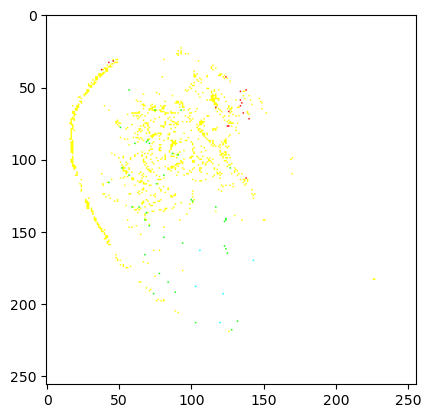

In [32]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[31].numpy())

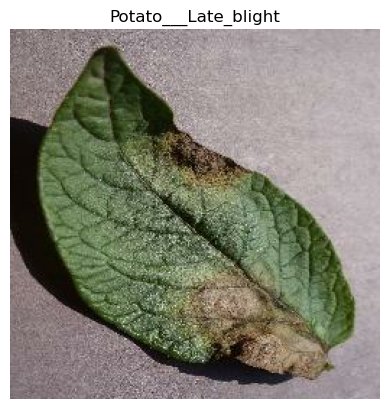

In [33]:
c=0
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[31].numpy().astype("uint8"))
    plt.title(class_names[label_batch[31]])
    plt.axis("off")

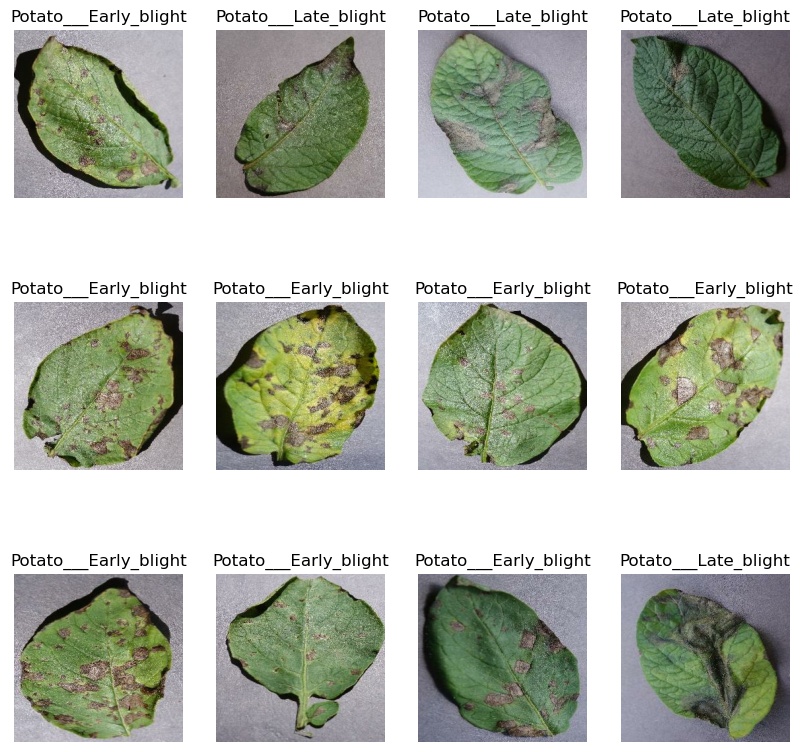

In [34]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
# plt.show()

In [35]:
len(dataset)

68

In [36]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [37]:
train_ds=dataset.take(54)
len(train_ds)

54

In [38]:
testing_ds=dataset.skip(54)
len(testing_ds)

14

In [39]:
validation_size=0.1
len(dataset)*validation_size

6.800000000000001

In [40]:
val_ds=testing_ds.take(6)
len(val_ds)

6

In [41]:
test_ds=testing_ds.skip(6)
len(test_ds)

8

In [42]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [43]:
resize_and_rescale=tf.keras.Sequential([layers.experimental.preprocessing.Resizing(Image_size,Image_size),
                    layers.experimental.preprocessing.Rescaling(1.0/255)])

In [44]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [45]:
input_shape=(Batch_size,Image_size,Image_size,Channels)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

model.build(input_shape=input_shape)

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (32, 516128)              0         
                                                                 
 dense (Dense)               (32, 64)                  33032256  
                                                      

In [47]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [48]:
hisyory=model.fit(train_ds,
         epochs=Epochs,
         batch_size=Batch_size,
         verbose=1,
         validation_data=val_ds
)

Epoch 1/5


54/54 [==============================] - 23s 332ms/step - loss: 7.0911 - accuracy: 0.6626 - val_loss: 0.6729 - val_accuracy: 0.7552
Epoch 2/5
54/54 [==============================] - 17s 314ms/step - loss: 0.4257 - accuracy: 0.8472 - val_loss: 0.3651 - val_accuracy: 0.8594
Epoch 3/5
54/54 [==============================] - 17s 321ms/step - loss: 0.2700 - accuracy: 0.8929 - val_loss: 0.5671 - val_accuracy: 0.7969
Epoch 4/5
54/54 [==============================] - 17s 310ms/step - loss: 0.2833 - accuracy: 0.8883 - val_loss: 0.3544 - val_accuracy: 0.8750
Epoch 5/5
54/54 [==============================] - 18s 329ms/step - loss: 0.1855 - accuracy: 0.9323 - val_loss: 0.2416 - val_accuracy: 0.9167


In [49]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 1s 49ms/step - loss: 0.2205 - accuracy: 0.9009


In [50]:
hisyory.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [51]:
hisyory.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [52]:
hisyory.history['accuracy']

[0.6626157164573669,
 0.8472222089767456,
 0.8929398059844971,
 0.8883101940155029,
 0.9322916865348816]

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 222ms/step
predicted label: Potato___Late_blight
[0.0225765  0.87195617 0.10546731]


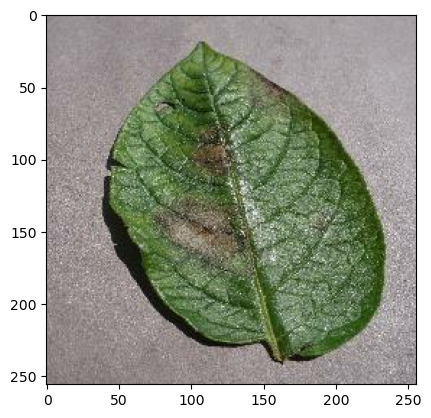

In [53]:
for image_batch,label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction=model.predict(image_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])
    print(batch_prediction[0])

In [54]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [55]:
import joblib

# Assuming your model is stored in a variable named 'model'
# Train your model first

# Save the model to a file
joblib.dump(model, 'your_model_filename.pkl')


['your_model_filename.pkl']